# Distribuciones continuas (e.j. gaussiana)

Recordemos que la distribución de probabilidad normal o gaussiana está dada por: 

$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

donde:

* $\mu$: media de la distribución

$$\mu = \frac{\sum_{i=1}^{N} x_i}{N}$$


* $\sigma$: desviación estandar de la distribución

$$\sigma = \sqrt{\frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}}$$


`Ejemplo`: considerando una variable aleatoria que sigue una distribución normal con media $\mu=4$ y desviación estándar $\sigma=0.3$, la probabilidad de que dicha variable tome el valor de $0.2$ está dada por: 

$$P(0.2) =  \frac{1}{0.3 \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{0.2-4}{0.3} \right)^2 \right]}$$

Lo cual en Python se traduce en: 

```python
from scipy.stats import norm

norm(mu, sigma).pdf(X)
```

---

Así también, la distribucion de probabilidad acumulada correspondiente está dada por: 

$$C(X) = \int_{x<=X} P(x)dx = \int_{- \infty}^xP(X)dX $$

teniendo en cuenta que $Dom(X) = (-\infty, \infty)$. 

`Ejemplo`: considerando una variable aleatoria que sigue una distribucion normal con media $\mu=4$ y desviación estándar $\sigma=0.3$, la probabilidad de que dicha variable tome el valor de $0.2$ o menos está dada por:

$$C(0.2) = \int_{x<=0.2} P(x)dx = \int_{- \infty}^{0.2}  \left\{\frac{1}{0.3 \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-4}{0.3} \right)^2 \right]} \right\} dX $$

La cual se calcula en Python como: 

```python 
from scipy.stats import norm

norm(mu, sigma).cdf(X)
```

_**Es importante recordar que la función de probabilidad acumulada de la distribución gaussiana no se puede calcular de forma exacta, ya que la integral anterior no tiene una expresión cerrada conocida. Es decir, los métodos de integración conocidos no funcionan para resolver esta integral.**_

entonces esto calcula la probabilidad que puede tomar una variable 
El cálculo de la distribución continua es importante porque permite a los estadísticos y científicos modelar y analizar eventos complejos que no pueden ser modelados por distribuciones discretas, como la distribución binomial o la distribución de Poisson.

haces esto si no lo puedes hacer con istribución binomial o la distribución de Poisson.

# Ejercicios (bloque 1)

Considerando una variable aleatoria que sigue una distribución normal con media $\mu=4$ y desviación estándar $\sigma=0.1$, calcula las siguientes probabilidades (usando Python):

1. $P(X=4)$
2. $P(X=-10)$
3. $P(X=10)$
4. $P(X<=4)$
6. $P(X>=4)$

usas pdf cuando es X=, y usas cdf cuando es X<= & X>=

se utiliza la función PDF cuando se busca calcular la probabilidad de que la variable aleatoria sea igual a un valor específico x, es decir, cuando se busca la probabilidad de P(X=x).

Por otro lado, la función de distribución acumulativa (CDF) se utiliza para calcular la probabilidad de que una variable aleatoria tome un valor menor o igual a un cierto punto en su rango de valores(en el caso de X<=x), o mayor o igual a un cierto punto en su rango de valores (en el caso de X>=x).

In [2]:
import scipy.stats as stats

# Definir los parámetros de la distribución normal
mu = 4
sigma = 0.1

# Calcular las probabilidades solicitadas

# 1. P(X=4)
p1 = stats.norm(mu, sigma).pdf(4)

# 2. P(X=-10)
p2 = stats.norm(mu, sigma).pdf(-10)

# 3. P(X=10)
p3 = stats.norm(mu, sigma).pdf(10)

# 4. P(X<=4)
p4 = stats.norm(mu, sigma).cdf(4)

# 5. P(X>=4)
p5 = 1 - stats.norm(mu, sigma).cdf(4)

# Imprimir los resultados
print("P(X=4) = ", p1)
print("P(X=-10) = ", p2)
print("P(X=10) = ", p3)
print("P(X<=4) = ", p4)
print("P(X>=4) = ", p5)


P(X=4) =  3.989422804014327
P(X=-10) =  0.0
P(X=10) =  0.0
P(X<=4) =  0.5
P(X>=4) =  0.5


# De la binomial a la gaussiana

En la clase 8 vimos como generar secuencias aleatorias de experimentos binomiales ([aquí](https://colab.research.google.com/drive/1MR9VZg19vHyZhvWWuxtNcy_3PZQ7AfwW?usp=sharing)), donde cada experimento era lanzar un cierto número de monedas. 

**¿Qué sucede si el número consecutivo de monedas que lanzamos en cada experimento (trial) es muy largo?**

La función `generate_binomial_trials()` nos muestra lo que sucede si graficamos los resultados de muchos experimentos de lanzar 100 monedas en cada intento, con pyplot: 

numero en la lista unico  [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 73]
numero de veces que se repite el mismo numero en la lista  [   2    3   13   17   55   90  164  249  449  711 1047 1581 2317 2982
 3867 4872 5817 6650 7166 7758 7951 7864 7406 6649 5842 4762 3961 3006
 2305 1641 1032  717  444  258  152   96   59   25   12    6    1    1]
numeros de exito [43 55 44 ... 56 57 53]


<BarContainer object of 42 artists>

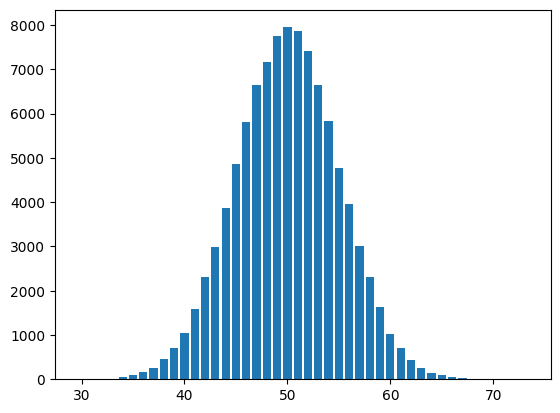

In [3]:
import numpy as np
from numpy.random import binomial
import matplotlib.pyplot as plt

def generate_binomial_trials(trials=1000, coin_toss=100):
  '''
  el resultado de esta funcion es generar un conjuntos 
  de experimentos binomiales (trials) y de cada uno obtener 
  las cantidades de exitos en cada secuencia (e.j. lanzar monedas).

  * trial: es una secuencia de <coin_toss> lanzamientos de moneda

  * coin_toss: es el numero de monedas lanzadas en cada trial
  '''
  arr = []
  for _ in range(trials):
    arr.append(binomial(coin_toss, 0.5))
  values, dist = np.unique(arr, return_counts=True)
# La función binomial devuelve el número de éxitos en coin_toss lanzamientos de una moneda equilibrada, 
# donde la probabilidad de éxito es de 0.5. El número de éxitos se agrega a la lista arr en cada iteración del bucle.
  return values, dist, np.array(arr)

values, dist, arr = generate_binomial_trials(100000)
print('numero en la lista unico ',values)# aqui se ve el valor unico ejemplo si salio 29 lo pongo por que salio cuantas veces salio nose pero se que salio 
print('numero de veces que se repite el mismo numero en la lista ',dist) # ejemplo si sale 2 es decir se repitio n numero 2 veces, yo se que salio el mismo numero 100 veces cual nose pero salio 100 veces 
print('numeros de exito',arr)# aqui te va a decir salio primero 32 caras luego 67 caras luego 43 caras, numeros ramdom, salio 51 luego 59 luego 60 etc en este primer intento que hice 100 veces de 1000 intentos 
plt.bar(values, dist)



 La variable values contiene los valores únicos de la lista arr, es decir, los números posibles de éxitos en cada trial. La variable dist contiene las frecuencias correspondientes a cada valor en values, es decir, cuántas veces aparece cada valor en la lista arr. La variable arr contiene todos los resultados de los trials experimentos binomiales.

¿Se parece a algo conocido? Tal vez una ditribución normal se ajuste, para verificarlo haremos el siguiente ejercicio: 

# Ejercicios (bloque 2)

1. Con los resultados anteriores guardados en `values, dist` ajusta, usando el método de estimación paramétrica, una distribución gaussiana donde la media y desviación estándar correspondan a lo calculado a partir de los datos, de la misma manera que se hizo en el notebook de la clase 9 ([aquí](https://colab.research.google.com/drive/1weFtkmxdn_WnGW582Xugj9t7Mjzxis5b?usp=sharing)).

<BarContainer object of 42 artists>

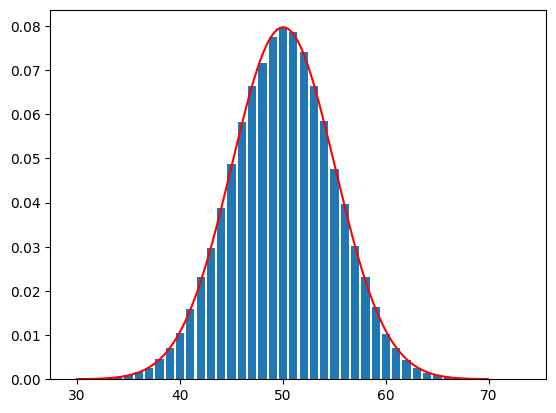

In [4]:
from scipy.stats import norm 
mu = arr.mean()
sigma = arr.std()
normal = norm(mu, sigma)

X = np.arange(30,70,0.1)
Y = [normal.pdf(i) for i in X]

plt.plot(X, Y,'r')
plt.bar(values, dist/len(arr))


Si todo salió bien, habrás notado que en efecto una distribución normal se ajusta perfectamente a los datos. Esto se conoce como el **teorema del límite central**, el cual establece que en muchas situaciones conocidas, cuando variables aleatorias independientes se combinan, su total tiende a seguir una distribución normal cuando el número de variables que se combinan es muy grande $n \rightarrow \infty$. 

In [12]:
def optimal_mu(arr=arr):
  mu = 0
  for i in arr:
    mu += i
  return mu/len(arr)

print(optimal_mu(), arr.mean())

50.01446 50.01446
